In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:

data = pd.read_csv("Performance.csv")
data.head()

,Loss Train,Loss Test,F1 Train,F1 Test
0,5.077271,1.885990,0.504950,0.318123
1,2.345235,2.157939,0.456083,0.268398
2,1.785701,1.010405,0.480621,0.644259
3,1.379618,0.986354,0.381363,0.568819
4,1.180076,0.932167,0.545846,0.672540


In [3]:
loss_train = data['Loss Train']
loss_test = data['Loss Test']
f1_train = data['F1 Train']
f1_test = data['F1 Test']

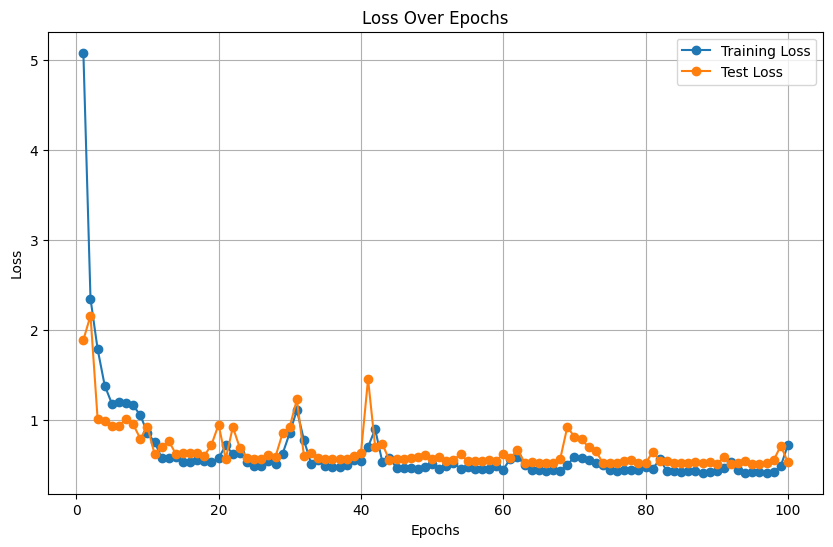

In [4]:

df = pd.read_csv("Performance.csv")
# Number of epochs
num_epochs = len(loss_train)

# Create a list of epoch numbers
epochs = list(range(1, num_epochs + 1))

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss_train, label='Training Loss', marker='o')
plt.plot(epochs, loss_test, label='Test Loss', marker='o')

# Add labels and a legend
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Over Epochs')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


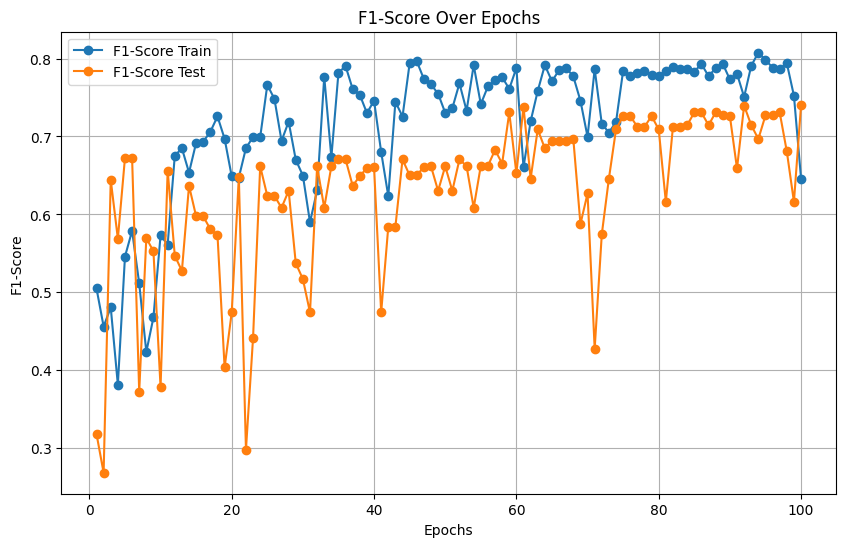

In [5]:
num_epochs = len(loss_train)

# Create a list of epoch numbers
epochs = list(range(1, num_epochs + 1))

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(epochs, f1_train, label='F1-Score Train', marker='o')
plt.plot(epochs, f1_test, label='F1-Score Test', marker='o')

# Add labels and a legend
plt.xlabel('Epochs')
plt.ylabel('F1-Score')
plt.title('F1-Score Over Epochs')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


# CONFUSION MATRIX

In [6]:
from BaseModel import BinaryClassifier
from ConfigModel import *
import torch
import torchvision
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

DEVICE: cuda


c:\Users\Administrator\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 64]           8,768
              ReLU-2                   [-1, 64]               0
            Linear-3                    [-1, 2]             130
Total params: 8,898
Trainable params: 8,898
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.03
Estimated Total Size (MB): 0.04
----------------------------------------------------------------


In [7]:
model = BinaryClassifier().to(DEVICE)


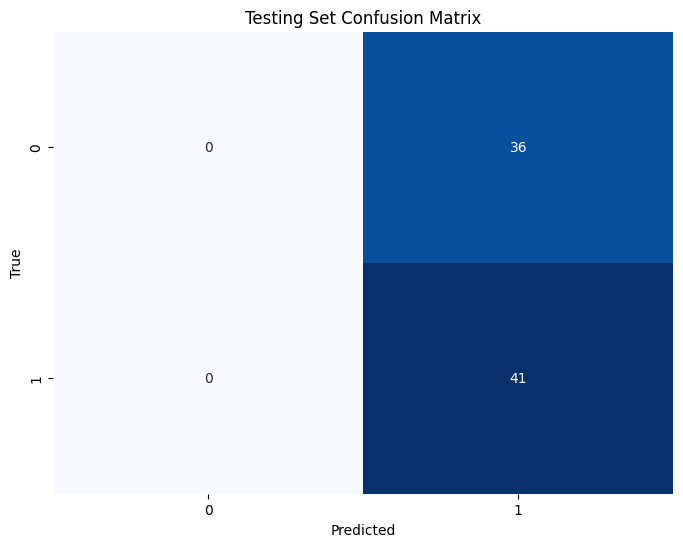

In [8]:
# Define the device (CPU or GPU) for the model
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Set the model to evaluation mode
model.eval()

# Testing Set
true_labels_test = []
predicted_labels_test = []

total_loss_test = 0.0
total_samples = 0

with torch.no_grad():
    for inputs, labels in TESTLOADER:
        inputs = inputs.to(DEVICE)
        labels = labels.to(DEVICE).long()
        outputs = model(inputs)
        loss_test = criterion(outputs, labels)
        total_loss_test += loss_test.item() * len(labels)
        total_samples += len(labels)

        _, predicted = torch.max(outputs.data, 1)
        predicted_labels_test.extend(predicted.cpu().numpy())
        true_labels_test.extend(labels.cpu().numpy())

# Compute the confusion matrix
confusion_test = confusion_matrix(true_labels_test, predicted_labels_test)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_test, annot=True, fmt='d', cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Testing Set Confusion Matrix")
plt.show()

# Checking Gradient

<Figure size 1200x600 with 0 Axes>

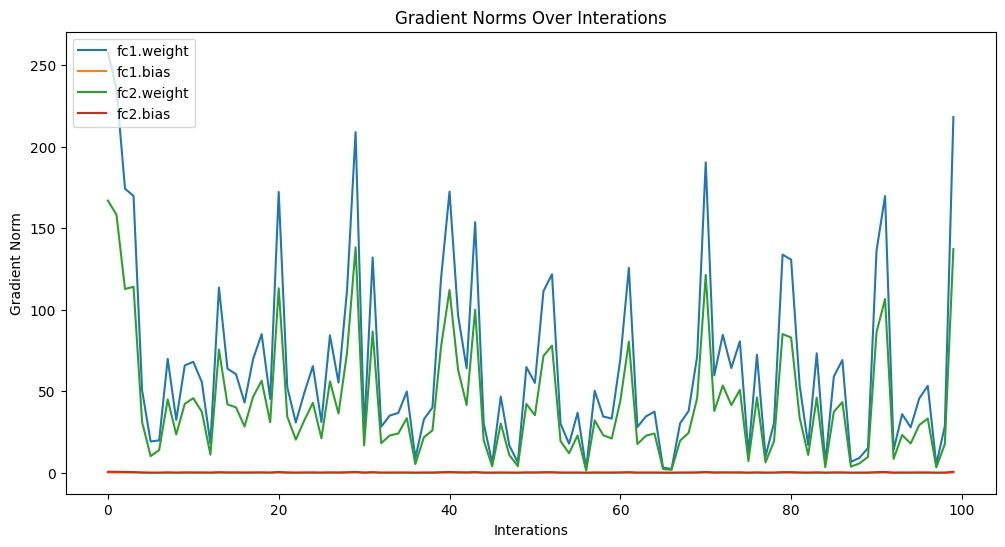

In [9]:
plt.figure(figsize=(12, 6))
data = pd.read_csv('EpochGradientNorms.csv')

# Plot the data
plt.figure(figsize=(12, 6))
for column in data.columns:
    plt.plot(data.index, data[column], label=column)

plt.xlabel('Interations')
plt.ylabel('Gradient Norm')
plt.legend(loc ='upper left')
plt.title('Gradient Norms Over Interations')
plt.show()
